## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.25,0.35,0.45,0.55]

In [13]:

results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with DR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:],drp_ratio=lr)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with DR = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)      

50000/50000 [==============================] - 26s 514us/step - loss: 1.4933 - acc: 0.4609 - val_loss: 1.4539 - val_acc: 0.4842
Epoch 50/50
50000/50000 [==============================] - 26s 517us/step - loss: 1.4828 - acc: 0.4666 - val_loss: 1.4283 - val_acc: 0.4968
Experiment with DR = 0.350000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)  

50000/50000 [==============================] - 26s 529us/step - loss: 1.6583 - acc: 0.4001 - val_loss: 1.6137 - val_acc: 0.4291
Epoch 48/50
50000/50000 [==============================] - 27s 533us/step - loss: 1.6558 - acc: 0.4010 - val_loss: 1.6244 - val_acc: 0.4358
Epoch 49/50
50000/50000 [==============================] - 27s 539us/step - loss: 1.6500 - acc: 0.4032 - val_loss: 1.6045 - val_acc: 0.4396
Epoch 50/50
50000/50000 [==============================] - 27s 540us/step - loss: 1.6581 - acc: 0.4003 - val_loss: 1.6258 - val_acc: 0.4308
Experiment with DR = 0.450000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)       

50000/50000 [==============================] - 30s 599us/step - loss: 1.8170 - acc: 0.3305 - val_loss: 1.8079 - val_acc: 0.3677
Epoch 46/50
50000/50000 [==============================] - 30s 600us/step - loss: 1.8171 - acc: 0.3305 - val_loss: 1.8058 - val_acc: 0.3600
Epoch 47/50
50000/50000 [==============================] - 29s 577us/step - loss: 1.8133 - acc: 0.3347 - val_loss: 1.7872 - val_acc: 0.3669
Epoch 48/50
50000/50000 [==============================] - 29s 583us/step - loss: 1.8178 - acc: 0.3311 - val_loss: 1.8163 - val_acc: 0.3622
Epoch 49/50
50000/50000 [==============================] - 29s 589us/step - loss: 1.8109 - acc: 0.3340 - val_loss: 1.8252 - val_acc: 0.3597
Epoch 50/50
50000/50000 [==============================] - 29s 578us/step - loss: 1.8163 - acc: 0.3304 - val_loss: 1.8188 - val_acc: 0.3527
Experiment with DR = 0.550000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (I

50000/50000 [==============================] - 27s 548us/step - loss: 2.0175 - acc: 0.2281 - val_loss: 2.0775 - val_acc: 0.2111
Epoch 44/50
50000/50000 [==============================] - 27s 533us/step - loss: 2.0221 - acc: 0.2233 - val_loss: 2.1054 - val_acc: 0.1912
Epoch 45/50
50000/50000 [==============================] - 27s 539us/step - loss: 2.0126 - acc: 0.2294 - val_loss: 2.1191 - val_acc: 0.2143
Epoch 46/50
50000/50000 [==============================] - 27s 545us/step - loss: 2.0173 - acc: 0.2278 - val_loss: 2.0869 - val_acc: 0.2144
Epoch 47/50
50000/50000 [==============================] - 27s 542us/step - loss: 2.0129 - acc: 0.2322 - val_loss: 2.0854 - val_acc: 0.2096
Epoch 48/50
50000/50000 [==============================] - 29s 582us/step - loss: 2.0170 - acc: 0.2265 - val_loss: 2.0566 - val_acc: 0.2261
Epoch 49/50
50000/50000 [==============================] - 27s 546us/step - loss: 2.0122 - acc: 0.2291 - val_loss: 2.0957 - val_acc: 0.2118
Epoch 50/50
50000/50000 [=======

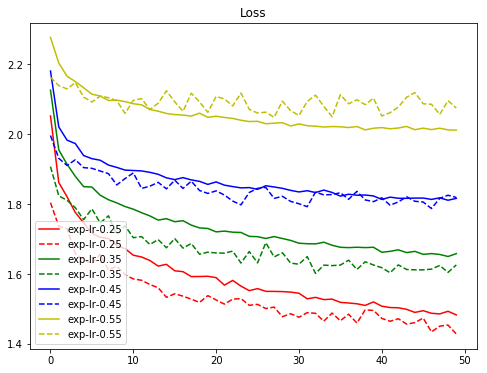

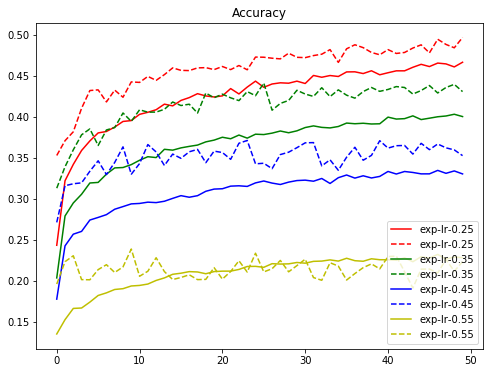

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()